In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
%matplotlib inline

In [3]:
course_df = pd.read_csv("courses.csv")

In [4]:
course_df

,Channel_group,course,lead_id,Lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,"1,42,649",ABC,17-05-2024 17:53,2008,NaN,NaN
1,A,Java,"41,63,228",XYZ,25-05-2024 15:23,2009,NaN,NaN
2,B,Java,"41,76,457",EFG,06-05-2024 10:12,2000,NaN,NaN
3,A,Java,"1,36,989",ABC,16-05-2024 12:31,2009,NaN,NaN
4,C,Java,"1,40,085",ABC,01-05-2024 20:35,2002,NaN,NaN
...,...,...,...,...,...,...,...,...
16455,A,Python,"41,79,788",EFG,03-05-2024 05:27,2023,NaN,NaN
16456,B,SEO,"41,73,873",XYZ,04-05-2024 18:40,2009,NaN,NaN
16457,A,SEO,"41,82,565",XYZ,28-05-2024 00:59,2008,NaN,NaN
16458,E,SEO,"41,77,786",XYZ,04-05-2024 07:55,2022,NaN,NaN


In [5]:
course_df.head()

,Channel_group,course,lead_id,Lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,"1,42,649",ABC,17-05-2024 17:53,2008,NaN,NaN
1,A,Java,"41,63,228",XYZ,25-05-2024 15:23,2009,NaN,NaN
2,B,Java,"41,76,457",EFG,06-05-2024 10:12,2000,NaN,NaN
3,A,Java,"1,36,989",ABC,16-05-2024 12:31,2009,NaN,NaN
4,C,Java,"1,40,085",ABC,01-05-2024 20:35,2002,NaN,NaN


In [6]:
course_df.columns

Index(['Channel_group', 'course', 'lead_id', 'Lead_type', 'lead_date',
       'graduation_year', 'amount_paid', 'paid_at'],
      dtype='object')

In [7]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Channel_group    16460 non-null  object 
 1   course           16460 non-null  object 
 2   lead_id          16460 non-null  object 
 3   Lead_type        16460 non-null  object 
 4   lead_date        16460 non-null  object 
 5   graduation_year  16460 non-null  int64  
 6   amount_paid      648 non-null    float64
 7   paid_at          648 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.0+ MB


In [8]:
course_df.dtypes

Channel_group       object
course              object
lead_id             object
Lead_type           object
lead_date           object
graduation_year      int64
amount_paid        float64
paid_at             object
dtype: object

#### Data Cleaning and Preprocessing

In [9]:
course_df.rename(columns={
    'Lead_date': 'Lead_Date',
    'Channel_group': 'channel_group',
    'Lead_type' : 'lead_type'
}, inplace=True)

In [10]:
course_df.head()

,channel_group,course,lead_id,lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,"1,42,649",ABC,17-05-2024 17:53,2008,NaN,NaN
1,A,Java,"41,63,228",XYZ,25-05-2024 15:23,2009,NaN,NaN
2,B,Java,"41,76,457",EFG,06-05-2024 10:12,2000,NaN,NaN
3,A,Java,"1,36,989",ABC,16-05-2024 12:31,2009,NaN,NaN
4,C,Java,"1,40,085",ABC,01-05-2024 20:35,2002,NaN,NaN


In [11]:
# Convert 'lead_date' to datetime
course_df['lead_date'] = pd.to_datetime(course_df['lead_date'], format='%d-%m-%Y %H:%M')
course_df['paid_at'] = pd.to_datetime(course_df['paid_at'], format='%d-%m-%Y %H:%M')

In [12]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channel_group    16460 non-null  object        
 1   course           16460 non-null  object        
 2   lead_id          16460 non-null  object        
 3   lead_type        16460 non-null  object        
 4   lead_date        16460 non-null  datetime64[ns]
 5   graduation_year  16460 non-null  int64         
 6   amount_paid      648 non-null    float64       
 7   paid_at          648 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.0+ MB


In [13]:
# Remove unwanted characters like commas or spaces
course_df['lead_id'] = course_df['lead_id'].str.replace(',', '')
course_df['lead_id'] = course_df['lead_id'].str.strip()

In [14]:
course_df.head()

,channel_group,course,lead_id,lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,142649,ABC,2024-05-17 17:53:00,2008,NaN,NaT
1,A,Java,4163228,XYZ,2024-05-25 15:23:00,2009,NaN,NaT
2,B,Java,4176457,EFG,2024-05-06 10:12:00,2000,NaN,NaT
3,A,Java,136989,ABC,2024-05-16 12:31:00,2009,NaN,NaT
4,C,Java,140085,ABC,2024-05-01 20:35:00,2002,NaN,NaT


In [15]:
# Find the maximum length of lead_id
max_length = course_df['lead_id'].str.len().max()

# Standardize lead_id by padding with zeros to match the max length
course_df['lead_id'] = course_df['lead_id'].str.zfill(max_length)

In [16]:
course_df

,channel_group,course,lead_id,lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,0142649,ABC,2024-05-17 17:53:00,2008,NaN,NaT
1,A,Java,4163228,XYZ,2024-05-25 15:23:00,2009,NaN,NaT
2,B,Java,4176457,EFG,2024-05-06 10:12:00,2000,NaN,NaT
3,A,Java,0136989,ABC,2024-05-16 12:31:00,2009,NaN,NaT
4,C,Java,0140085,ABC,2024-05-01 20:35:00,2002,NaN,NaT
...,...,...,...,...,...,...,...,...
16455,A,Python,4179788,EFG,2024-05-03 05:27:00,2023,NaN,NaT
16456,B,SEO,4173873,XYZ,2024-05-04 18:40:00,2009,NaN,NaT
16457,A,SEO,4182565,XYZ,2024-05-28 00:59:00,2008,NaN,NaT
16458,E,SEO,4177786,XYZ,2024-05-04 07:55:00,2022,NaN,NaT


Here I am assuming- <br>
amount_paid: Represents the amount a lead has paid.<br>
Missing values likely indicate leads that haven’t made a payment yet.<br>
paid_at: Represents the date of payment.<br>
Missing values usually imply no payment was made.<br>

In [17]:
course_df['amount_paid'] = course_df['amount_paid'].fillna(0)  # Set missing amount_paid to 0
course_df['paid_at'] = course_df['paid_at'].fillna(pd.NaT)  # Set missing paid_at to NaT

In [18]:
course_df.head()

,channel_group,course,lead_id,lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,0142649,ABC,2024-05-17 17:53:00,2008,0.0,NaT
1,A,Java,4163228,XYZ,2024-05-25 15:23:00,2009,0.0,NaT
2,B,Java,4176457,EFG,2024-05-06 10:12:00,2000,0.0,NaT
3,A,Java,0136989,ABC,2024-05-16 12:31:00,2009,0.0,NaT
4,C,Java,0140085,ABC,2024-05-01 20:35:00,2002,0.0,NaT


In [19]:
# Extract Year, Month, and Day from lead_date
course_df['lead_year'] = course_df['lead_date'].dt.year
course_df['lead_month'] = course_df['lead_date'].dt.month
course_df['lead_day'] = course_df['lead_date'].dt.day

In [20]:
course_df.head()

,channel_group,course,lead_id,lead_type,lead_date,graduation_year,amount_paid,paid_at,lead_year,lead_month,lead_day
0,A,Java,0142649,ABC,2024-05-17 17:53:00,2008,0.0,NaT,2024,5,17
1,A,Java,4163228,XYZ,2024-05-25 15:23:00,2009,0.0,NaT,2024,5,25
2,B,Java,4176457,EFG,2024-05-06 10:12:00,2000,0.0,NaT,2024,5,6
3,A,Java,0136989,ABC,2024-05-16 12:31:00,2009,0.0,NaT,2024,5,16
4,C,Java,0140085,ABC,2024-05-01 20:35:00,2002,0.0,NaT,2024,5,1


### Exploratory Data Analysis

#### Conversion Analysis
Assuming:<br>
Leads with amount_paid > 0 are considered converted.<br>
Analyzing the conversion rate across different dimensions (e.g., channel_group, course, lead_type).

In [21]:
course_df['converted'] = course_df['amount_paid'] > 0

# Overall conversion rate
conversion_rate = course_df['converted'].mean() * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

Overall Conversion Rate: 3.94%


In [22]:
# Conversion rate by channel_group
conversion_by_channel = course_df.groupby('channel_group')['converted'].mean() * 100
print(conversion_by_channel)

channel_group
A     3.946041
B    17.543860
C     8.345753
D     6.877898
E     1.944444
F     0.189155
G     1.366743
H     2.165605
I     0.473934
J     0.000000
K     0.000000
L     0.000000
M     0.728597
Name: converted, dtype: float64


In [23]:
# Conversion rate by course
conversion_by_course = course_df.groupby('course')['converted'].mean() * 100
print(round(conversion_by_course,2))

course
CRM                 4.87
Figma               3.38
Google Analytics    3.24
Guitar              4.57
Java                4.26
Python              3.05
SEO                 4.12
Name: converted, dtype: float64


In [24]:
# Conversion rate by course
conversion_by_lead_type = course_df.groupby('lead_type')['converted'].mean() * 100
print(round(conversion_by_lead_type,2))

lead_type
ABC    3.83
EFG    5.87
LMN    0.00
XYZ    0.86
Name: converted, dtype: float64


#### Payment Patterns
Assuming:<br>
The time it takes for leads to convert (paid_at - lead_date).<br>
Analyzing the average time to conversion by course or channel.

In [25]:
course_df['time_to_payment'] = (course_df['paid_at'] - course_df['lead_date']).dt.days
# Average time to payment by course
avg_time_to_payment = course_df.groupby('course')['time_to_payment'].mean()
avg_time_to_payment = avg_time_to_payment.round().astype('Int64')
print(avg_time_to_payment)

course
CRM                  8
Figma                9
Google Analytics    10
Guitar               8
Java                 8
Python               7
SEO                  7
Name: time_to_payment, dtype: Int64


In [26]:
# Average time to payment by channel
avg_time_to_payment = course_df.groupby('channel_group')['time_to_payment'].mean()
avg_time_to_payment = avg_time_to_payment.round().astype('Int64')
print(avg_time_to_payment)

channel_group
A       8
B       8
C       8
D       9
E       9
F       5
G       4
H       8
I       1
J    <NA>
K    <NA>
L    <NA>
M      10
Name: time_to_payment, dtype: Int64


### Revenue Analysis
Analyzing Revenue by Course or Channel:<br>
Aggregating amount_paid to understand which courses or channels bring the most revenue.

In [27]:
# Total revenue by course
revenue_by_course = course_df.groupby('course')['amount_paid'].sum().sort_values(ascending=False)
print(revenue_by_course)

course
Java                8760762.0
CRM                 5575500.0
Guitar              4367187.0
Python              4243668.0
Figma               1499355.0
Google Analytics    1390884.0
SEO                 1165010.0
Name: amount_paid, dtype: float64


In [28]:
# Total revenue by channel
revenue_by_channel = course_df.groupby('channel_group')['amount_paid'].sum().sort_values(ascending=False)
print(revenue_by_channel)

channel_group
A    12911946.0
B     5472016.0
D     3789779.0
C     2321917.0
E      877350.0
H      699128.0
M      499179.0
G      261783.0
F      137119.0
I       32149.0
J           0.0
K           0.0
L           0.0
Name: amount_paid, dtype: float64


### Visualization

#### Lead Generation by Channel Group

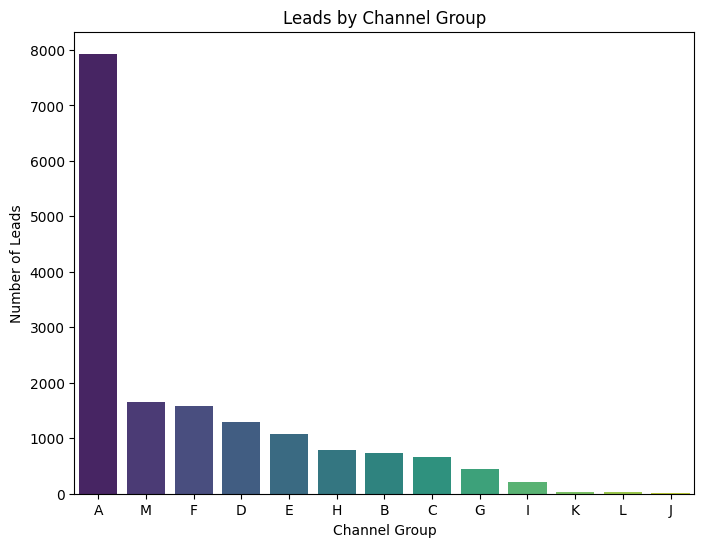

In [29]:
lead_channel = course_df['channel_group'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=lead_channel.index, y=lead_channel.values, palette="viridis",hue=lead_channel.index )
plt.title("Leads by Channel Group")
plt.ylabel("Number of Leads")
plt.xlabel("Channel Group")
plt.show()


#### High-Performing Courses

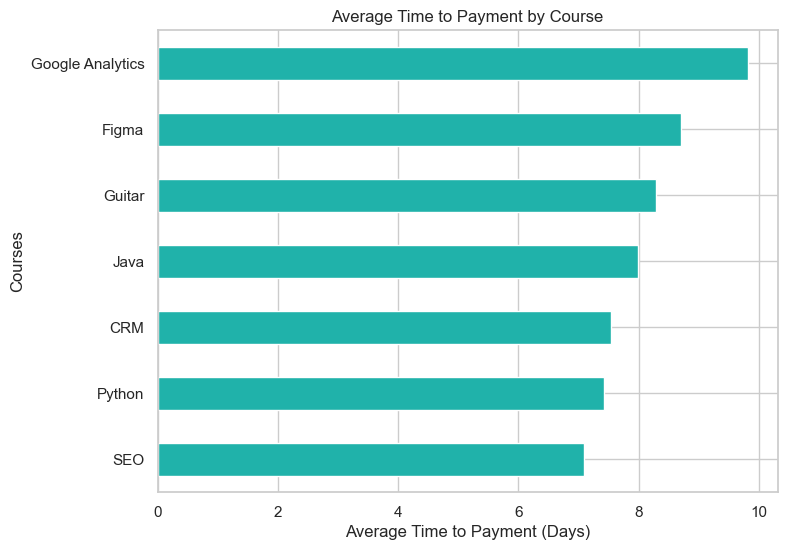

In [83]:
course_performance = course_df.groupby('course')['time_to_payment'].mean().sort_values()
plt.figure(figsize=(8, 6))
course_performance.plot(kind='barh', color='lightseagreen')
plt.title("Average Time to Payment by Course")
plt.xlabel("Average Time to Payment (Days)")
plt.ylabel("Courses")
plt.show()

#### Lead Distribution Across Courses

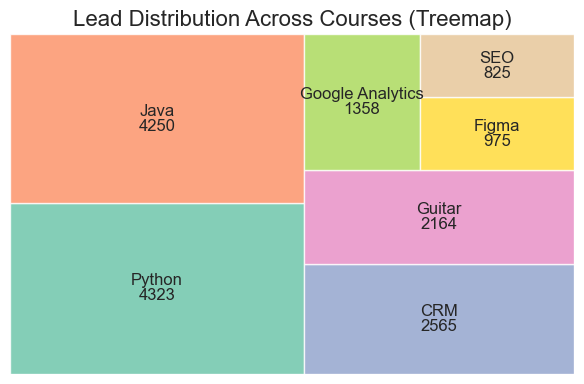

In [90]:
course_leads = course_df.groupby('course')['lead_id'].nunique().reset_index()
course_leads = course_leads.sort_values(by='lead_id', ascending=False)
course_leads = course_leads[course_leads['lead_id'] > 0]

# Check if the dataset is empty after filtering
if course_leads.empty:
    print("No data available to plot the treemap.")
else:
    # Plotting the treemap
    plt.figure(figsize=(6, 4))
    squarify.plot(
        sizes=course_leads['lead_id'],
        label=course_leads['course'],
        value=course_leads['lead_id'],
        color=sns.color_palette("Set2", len(course_leads)),
        alpha=0.8
    )

    plt.title("Lead Distribution Across Courses (Treemap)", fontsize=16)
    plt.axis('off') 
    plt.tight_layout()
    plt.show()

####  Revenue distribution by lead type

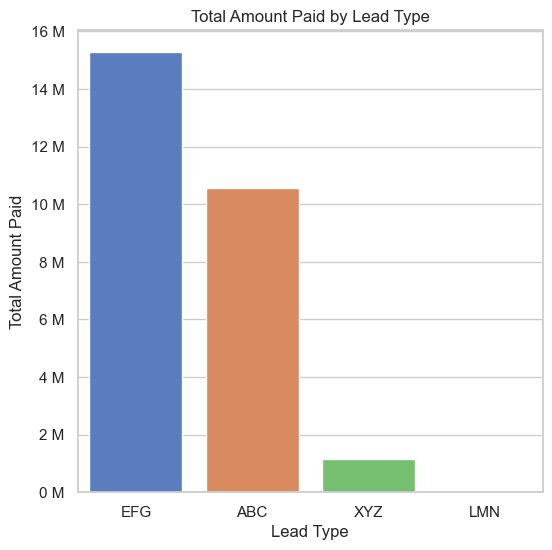

In [69]:
lead_type_conversion = lead_type_conversion.sort_values(by='amount_paid', ascending=False)
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.barplot(x='lead_type', y='amount_paid', data=lead_type_conversion, color='#F8AE54',palette="muted",hue="lead_type")
plt.title("Total Amount Paid by Lead Type")
plt.xlabel("Lead Type")
plt.ylabel("Total Amount Paid")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1_000_000)} M'))
plt.show()

#### Revenue Contributions by Courses

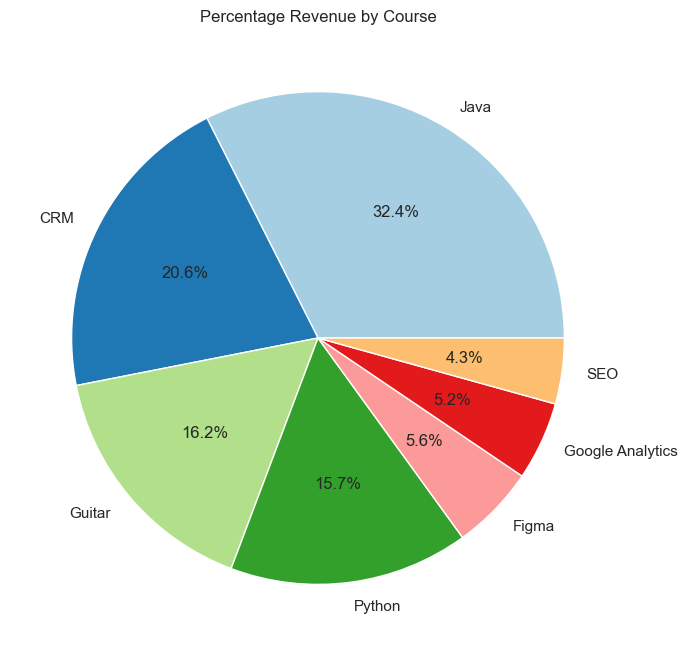

In [51]:
course_revenue = course_df.groupby('course')['amount_paid'].sum().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(course_revenue, labels=course_revenue.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Percentage Revenue by Course")
plt.show()